# Flights data exploration
## by Jean-Luc COSSI

## Preliminary Wrangling

> I use Python visualization libraries to systematically explore "Reporting Carrier On-Time Performance" for several years. Those data files have been selected from http://stat-computing.org/dataexpo/2009/the-data.html.  
A detailed presentation of the data is available here https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime, time

%matplotlib inline

As the original files were too big, I created a random sample of the original files I chose to use.

> Load in the dataset and describe its properties. We motivate our exploration goals through this section.

In [2]:
# load data files
df_1987 = pd.read_csv('data/1988_sample.csv')
df_1989 = pd.read_csv('data/1989_sample.csv')
df_1990 = pd.read_csv('data/1990_sample.csv')
df_1991 = pd.read_csv('data/1991_sample.csv')
df_1992 = pd.read_csv('data/1992_sample.csv')

In [3]:
# concat all into one dafaframe
df = pd.concat([df_1987, df_1989, df_1990, df_1991, df_1992], ignore_index=True)

In [4]:
# Get the dataframe size
df.shape

(75000, 29)

In [5]:
# Get a view on some values
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
26198,1989,2,4,6,817.0,817,1030.0,1030,DL,439,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
16427,1989,8,8,2,1528.0,1510,1609.0,1548,US,2864,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
40095,1990,6,15,5,1142.0,1140,1249.0,1243,DL,548,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
56325,1991,6,3,1,2030.0,2030,2209.0,2215,WN,660,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
64794,1992,3,23,1,1330.0,1315,1633.0,1549,AA,528,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Observation: there are missing data in some columns.

In [6]:
# Get the columns types
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [7]:
# Where are the missing data ?
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                833
CRSDepTime               0
ArrTime               1015
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              75000
ActualElapsedTime     1015
CRSElapsedTime           0
AirTime              75000
ArrDelay              1015
DepDelay               833
Origin                   0
Dest                     0
Distance               443
TaxiIn               75000
TaxiOut              75000
Cancelled                0
CancellationCode     75000
Diverted                 0
CarrierDelay         75000
WeatherDelay         75000
NASDelay             75000
SecurityDelay        75000
LateAircraftDelay    75000
dtype: int64

In [8]:
# Make a copy of the original dataframe
df_flights = df.copy()

In [9]:
# Drop the columns where all elements are missing
df_flights.drop('TailNum', axis=1, inplace=True)
df_flights.drop('AirTime', axis=1, inplace=True)
df_flights.drop('TaxiIn', axis=1, inplace=True)
df_flights.drop('TaxiOut', axis=1, inplace=True)
df_flights.drop('CancellationCode', axis=1, inplace=True)
df_flights.drop('CarrierDelay', axis=1, inplace=True)
df_flights.drop('WeatherDelay', axis=1, inplace=True)
df_flights.drop('NASDelay', axis=1, inplace=True)
df_flights.drop('SecurityDelay', axis=1, inplace=True)
df_flights.drop('LateAircraftDelay', axis=1, inplace=True)

In [10]:
# Where are the missing data ?
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [12]:
df_flights.shape

(75000, 19)

In [13]:
# Check the result
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [14]:
# Set the "Cancelled" column type to boolean
df_flights['Cancelled'] = df_flights['Cancelled'].astype('bool')

In [15]:
# How many cancelled flights do we have ?
df_flights.query('Cancelled').isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime              833
CRSDepTime             0
ArrTime              833
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
ActualElapsedTime    833
CRSElapsedTime         0
ArrDelay             833
DepDelay             833
Origin                 0
Dest                   0
Distance               3
Cancelled              0
Diverted               0
dtype: int64

So the cancelled flight might be the ones with NaN as `DepTime`, which makes sens. So I keep the remaining lines with NaN.

In [16]:
# Set the "Year", "Month" and "DayOfMonth" to datetime
# Rename the needed columns for the datetime conversion
df_flights = df_flights.rename(columns={'Year': 'year', 'Month': 'month', 'DayofMonth': 'day'})

# Create a new column as the datetime
df_flights['timestamp'] = pd.to_datetime(df_flights[['year', 'month', 'day']])

In [17]:
# Drop the previous year, month, day columns we don't need anymore
df_flights.drop('year', axis=1, inplace=True)
df_flights.drop('month', axis=1, inplace=True)
df_flights.drop('day', axis=1, inplace=True)

In [18]:
# View samples
df_flights.sample(5)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,timestamp
74458,2,853.0,855,1452.0,1504,UA,1794,239.0,249,-12.0,-2.0,PHX,IAD,1956.0,False,0,1992-02-11
38039,4,1650.0,1650,1937.0,1855,AA,1478,167.0,125,42.0,0.0,SJC,SEA,697.0,False,0,1990-10-04
35175,7,2223.0,2002,56.0,2240,HP,234,93.0,98,136.0,141.0,PHX,MAF,580.0,False,0,1990-11-11
41388,6,700.0,700,908.0,907,UA,1428,128.0,127,1.0,0.0,TPA,IAD,810.0,False,0,1990-02-24
41258,5,2215.0,2125,56.0,5,EA,59,161.0,160,51.0,50.0,LGA,MCO,950.0,False,0,1990-07-20


In [31]:
# Statistics summary
df_flights.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Diverted
count,75000.000000,74167.000000,75000.000000,73985.000000,75000.000000,75000.000000,73985.000000,75000.000000,73985.000000,74167.000000,74557.000000,75000.000000
mean,3.935933,1356.404452,1349.291093,1495.752747,1496.337747,764.782680,109.517321,109.683187,6.425316,6.712069,632.865056,0.002427
std,1.993787,476.468174,470.616674,493.993749,483.022413,549.033716,64.523552,64.192486,23.424589,20.950645,520.210695,0.049202
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,15.000000,-65.000000,-51.000000,11.000000,0.000000
25%,2.000000,936.000000,930.000000,1118.000000,1118.000000,336.000000,64.000000,65.000000,-5.000000,0.000000,270.000000,0.000000
50%,4.000000,1337.000000,1330.000000,1522.000000,1521.000000,651.000000,90.000000,90.000000,1.000000,0.000000,457.000000,0.000000
75%,6.000000,1744.500000,1735.000000,1920.000000,1915.000000,1097.000000,139.000000,139.000000,11.000000,5.000000,861.000000,0.000000
max,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,3362.000000,625.000000,625.000000,583.000000,1425.000000,4983.000000,1.000000


### What is the structure of your dataset?

> There are 73546 records of flights, over 5 years. There are time variables (mainly expected times and delays), numeric variables and text variables such are origins, destinations and carriers' names. We also have boolean like information (here as 0 or 1) to know if the flight is canceled or diverted.


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the following :
1. Are there certain destinations or arrival cities that are home to more delays or cancellations ?
2. What are the preferred times for flights to occur ? Are there any changes over the years ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For my first feature of interest, looking into `Cancelled` which indicates if the flight has been canceled or not, will be a key. The reason of the cancellation identified as `cancellationCode` might be interesting to have more insights.   
Regarding Delaying, I think that arrival delays (`ArrDelay`) will help to support my investigation.  
Later, I will dive into cancelation and arrival delays relationships with the arrival cities or destinations here identified as `Dest`.    
> For the second one, "What are the preferred times for flights to occur ?" : I will focus on departure and arrival time here `DepTime`and `ArrTime`. Then, I will develop an understanding on any changes over the years `Year`.

## Univariate Exploration

In this section, I investigate distributions of the individual variables.

### Feature of interest 1 : Are there certain destinations or arrival cities that are home to more delays or cancellations?

Looking at the `Canceled` variable. 

In [26]:
# Get the number of cancelled
cancelled = df_flights.query('Cancelled == True')['Cancelled'].count()
non_cancelled = df_flights.shape[0] - cancelled

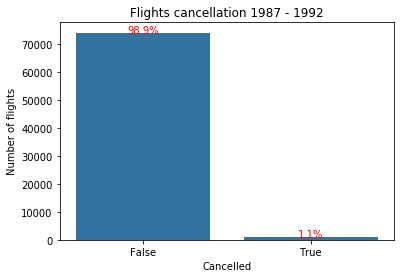

In [29]:
# Create a bar chart of the cancelation state
# Use only one color
base_color = sb.color_palette()[0]

# plot the bar chart
cancelled_bar = sb.countplot(data = df_flights, x = 'Cancelled', color = base_color)

# Set labels names
cancelled_bar.set(title='Flights cancellation 1987 - 1992', xlabel='Cancelled', ylabel='Number of flights')

# label the frequencies on the bars
# First, calculate non cancelled percentage
non_cancelled_percent = '{:0.1f}%'.format(100*non_cancelled/df_flights.shape[0])

# calculate the cancelled percentage
cancelled_percent = '{:0.1f}%'.format(100*cancelled/df_flights.shape[0])

# Set the labels names on the bars
plt.text(0, non_cancelled-8, non_cancelled_percent, ha = 'center', color = 'r')
plt.text(1, cancelled-8, cancelled_percent, ha = 'center', color = 'r');

Now, let's observe the `ArrDelay` variable.   
For coherency, I need to use a dataframe with all the cancelled flights removed. 

In [50]:
# Get a copy of the dataframe we started to clean
df_completed_flights = df_flights.copy()

In [51]:
# Now we delete the rows where at least one element is missing
df_completed_flights.dropna(inplace=True)

Now I can plot `ArrDelay`

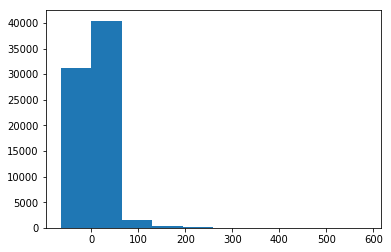

In [53]:
# basic plot for Arrival delay distribution
plt.hist(data = df_completed_flights, x = 'ArrDelay');

The graph is right skewed.  
I need to find a more appropriate bin. So let's have a look on the default bin-selection used by seaborn `displot` for this case. 

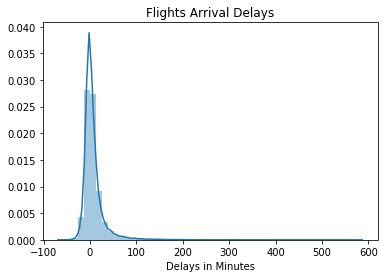

In [70]:
# Plot the arrival delays
arrdelay_plot = sb.distplot(df_completed_flights['ArrDelay'])

# Set labels names
arrdelay_plot.set(title='Flights Arrival Delays', xlabel='Delays in Minutes');

From the statistic summary above, I know that even if the max delay is 583 minutes, the majority of the values should be around zero, with a min value of -65 minutes.  
So let's explore any possibility to have a more adapted bin selection, so I can have a better view on the values around zero.

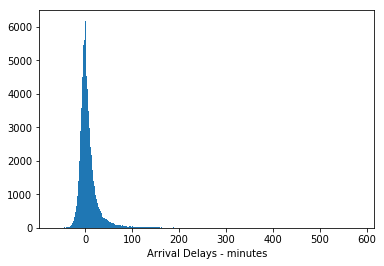

In [100]:
# tentative for a better bin selection
# start the range at the min() as observed from the summary statistics
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)

# plot the histogram with the bins
sb.distplot(df_completed_flights['ArrDelay'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlabel('Arrival Delays - minutes');

I've plotted using bin width form 0.6 to 15 and finally found out that the default bin-selection from seaborn `displot` offers more readability in this situation. So I choose 2 as bin width.

My original point was that it is right skewed. So let's zoom on the main bulk of the data throught the use of axis limits.

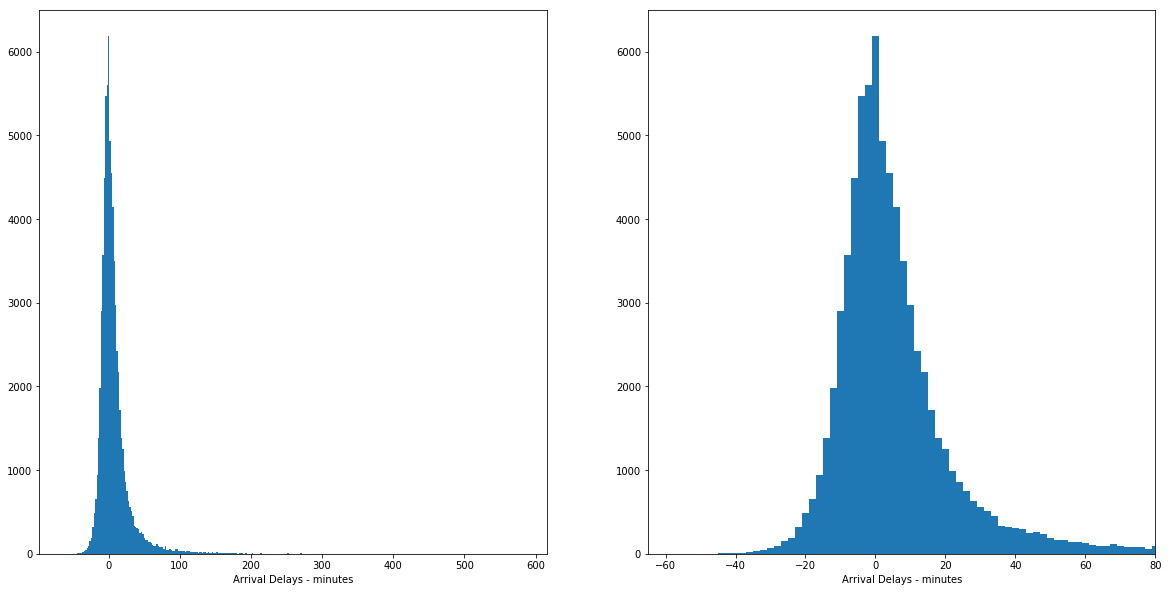

In [103]:
# tentative for a better zoom selection
# set the figures sizes
plt.figure(figsize = [20, 10])

# plot the full data with the bin width I found adapted
plt.subplot(1, 2, 1)
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)
plt.hist(data = df_completed_flights, x = 'ArrDelay', bins = bin_edges)
plt.xlabel('Arrival Delays - minutes')

# plot another histogram including the zoom
plt.subplot(1, 2, 2)
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)
plt.hist(data = df_completed_flights, x = 'ArrDelay', bins = bin_edges)

# set the  x values limitation for the 2nd histogram. I start at the min() and use 70 as the right limit
plt.xlim((df_completed_flights['ArrDelay'].min(), 80))
plt.xlabel('Arrival Delays - minutes'); 

The majority of the delays are between (more and less, an eyeballed) -40 minutes (early arrival) and +80 minutes (late).  
This data, as highly skewed, is following a kind of log-normal distribution. A logarithm transformation is not possible here due to the negative values we have. 

Now let's see if we can grab elements regarding the causes of the outliers, meaning flights with arrival delay more that 80 minutes. 

In [111]:
# getting to the high outliers (Arrival delays > 80 minutes)
df_highlate = df_completed_flights.query('ArrDelay > 80')
df_highlate.shape[0], df_completed_flights.shape[0], (df_highlate.shape[0] / df_completed_flights.shape[0])*100

(1230, 73546, 1.6724227014385553)

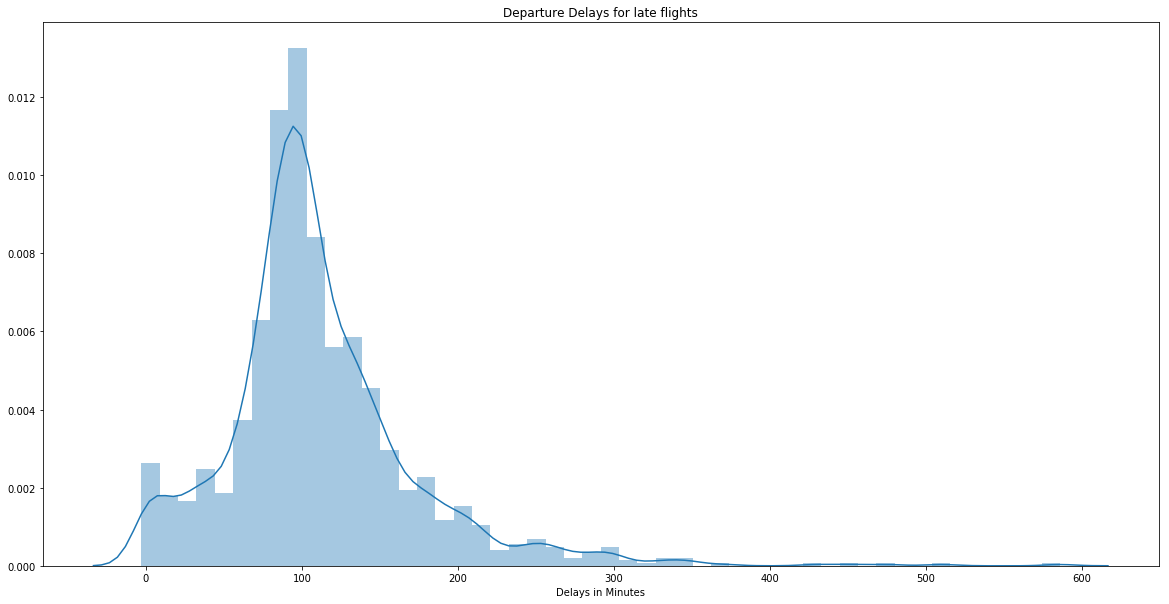

In [117]:
# I expect to see that the high outliers have all a departure delay

# Set a more bigger figure size
plt.figure(figsize = [20, 10])

# Plot the departure delays
depdelay_plot = sb.distplot(df_highlate['DepDelay'])

# Set labels names
depdelay_plot.set(title='Departure Delays for late flights', xlabel='Delays in Minutes');

Strange : some of those flights had a negative departure delays, meaning the flights started in advance

In [118]:
# The flights started in advance, but arrived late !
df_highlate.query('DepDelay < 0')

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,timestamp
4649,1,625.0,627,1211.0,825,PS,1698,346.0,118,226.0,-2.0,PSC,SFO,620.0,False,0,1988-02-08
33311,4,927.0,930,1215.0,1052,UA,1704,168.0,82,83.0,-3.0,LAX,SFO,337.0,False,0,1990-04-19
34599,7,1614.0,1615,1921.0,1730,US,769,187.0,75,111.0,-1.0,BWI,UCA,282.0,False,0,1990-09-16
36055,1,859.0,900,1611.0,1446,AA,88,312.0,226,85.0,-1.0,SAN,ORD,1723.0,False,0,1990-03-05
40432,4,1343.0,1345,1631.0,1445,US,1109,168.0,60,106.0,-2.0,ROC,EWR,246.0,False,0,1990-04-19
53895,2,1255.0,1256,1550.0,1358,AA,1365,235.0,122,112.0,-1.0,RDU,ORD,647.0,False,0,1991-09-03
60079,5,1816.0,1817,2143.0,1950,UA,27,207.0,93,113.0,-1.0,BOS,IAD,413.0,False,0,1992-07-10
63054,5,703.0,704,932.0,809,TW,523,149.0,65,83.0,-1.0,IND,STL,229.0,False,0,1992-04-10
64569,1,706.0,707,921.0,754,TW,355,135.0,47,87.0,-1.0,PBI,MCO,142.0,False,0,1992-10-26
69903,2,816.0,817,1128.0,929,UA,593,192.0,72,119.0,-1.0,ORD,DSM,299.0,False,0,1992-12-29


This is not clear.  It might have someting to do with geography, cities positioning maybe. So let's move on to the relations with the cities.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1st variable : `Cancelled`  
This is a categorical variable with 2 states. The relevant information here is the proportion of the cancelled flights versus the ones really performed. I saw very law 1.1% of cancelled flights, which indeed is still important in the flight industry.   
> 2nb variable : `ArrDelay`   
The histogram is right skewed. I tried to find an appropriate bin width for the histogram visualization. Then I zoomed on the main bulk of the data through the use of axis limits.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> `Cancelled` : I converted the data type to boolean. It was int64 with 0 or 1. Boolean True or False was more easy to understand information, especially on the graph, but also for data exploration by code.  
> Regarding `ArrDelay`: I did not perform any specific operations on the data, which were alreay in minutes. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Feature of interest 1 : Are there certain destinations or arrival cities that are home to more delays or cancellations?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!